In [81]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# read in data and get square footage of buildings
btus = pd.read_csv('/Users/Maddie/Desktop/DSSG/heating_loads/BTU_regression_estimates_Anchorage.csv')
sq_ft = np.sort(np.array(btus['sq_ft'].to_list()))
building_inds = np.arange(len(sq_ft))
btus['unique_ind'] = building_inds

In [83]:
# specify bin settings
bin_range = 1000 # max square foot difference in bin
num_bins = int((max(sq_ft) - min(sq_ft))/bin_range) + 1 # total number of bins

# create bins
bins = {}
for i in range(num_bins):
    bins[i] = []
    
# fill bins
for i in range(len(sq_ft)):
    building = sq_ft[i]
    building_ind = building_inds[i]
    bin_ = int(building/bin_range)
    bins[bin_].append(building_ind)

# get count of buildings in each bin
bin_count = np.zeros(num_bins)
for i in range(num_bins):
    bin_count[i] = len(bins[i])

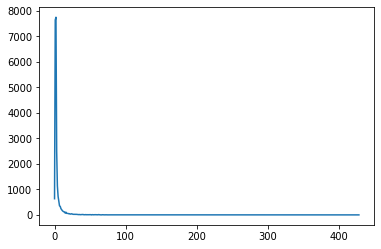

In [84]:
plt.plot(bin_count) # number of buildings per bin

In [85]:
# generate bin probabilities for sampling
bin_probs = bin_count/sum(bin_count)

# choose bins based on bin probabilities
bins_to_sample = np.random.choice(np.arange(num_bins),  len(sq_ft),  p=bin_probs)

# train, val, test split
num_train = int(.6 *len(sq_ft))
num_val = int(.2 *len(sq_ft))
num_test = len(sq_ft) - num_train - num_val

train_bins = bins_to_sample[:num_train]
val_bins = bins_to_sample[num_train:num_val]
test_bins = bins_to_sample[num_val:]


In [86]:
# now randomly choose buildings from bins for train
sampled_buildings_train = []
for bin_ind in train_bins:
    choice = np.random.choice(bins[bin_ind])
    sampled_buildings_train.append(choice)
    
    # remove it from the bins so it won't be sampled in val or test
    bins[bin_ind].remove(choice)
    
# now randomly choose buildings from bins for val
sampled_buildings_val = []
for bin_ind in val_bins:
    choice = np.random.choice(bins[bin_ind])
    sampled_buildings_val.append(choice)
    
    # remove it from the bins so it won't be sampled in test
    bins[bin_ind].remove(choice)

# now randomly choose buildings from bins for test
sampled_buildings_test = []
for bin_ind in val_bins:
    choice = np.random.choice(bins[bin_ind])
    sampled_buildings_test.append(choice)


ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
# TODO: are we sampling from bins too much?